In [1]:
import argparse
import pickle
from itertools import product

import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

from communityDetection import load_network
from models import *
from utils.util import eval

Epoch   4: 100%|██████████| 34/34 [00:00<00:00, 27060.03it/s, no friend=10]


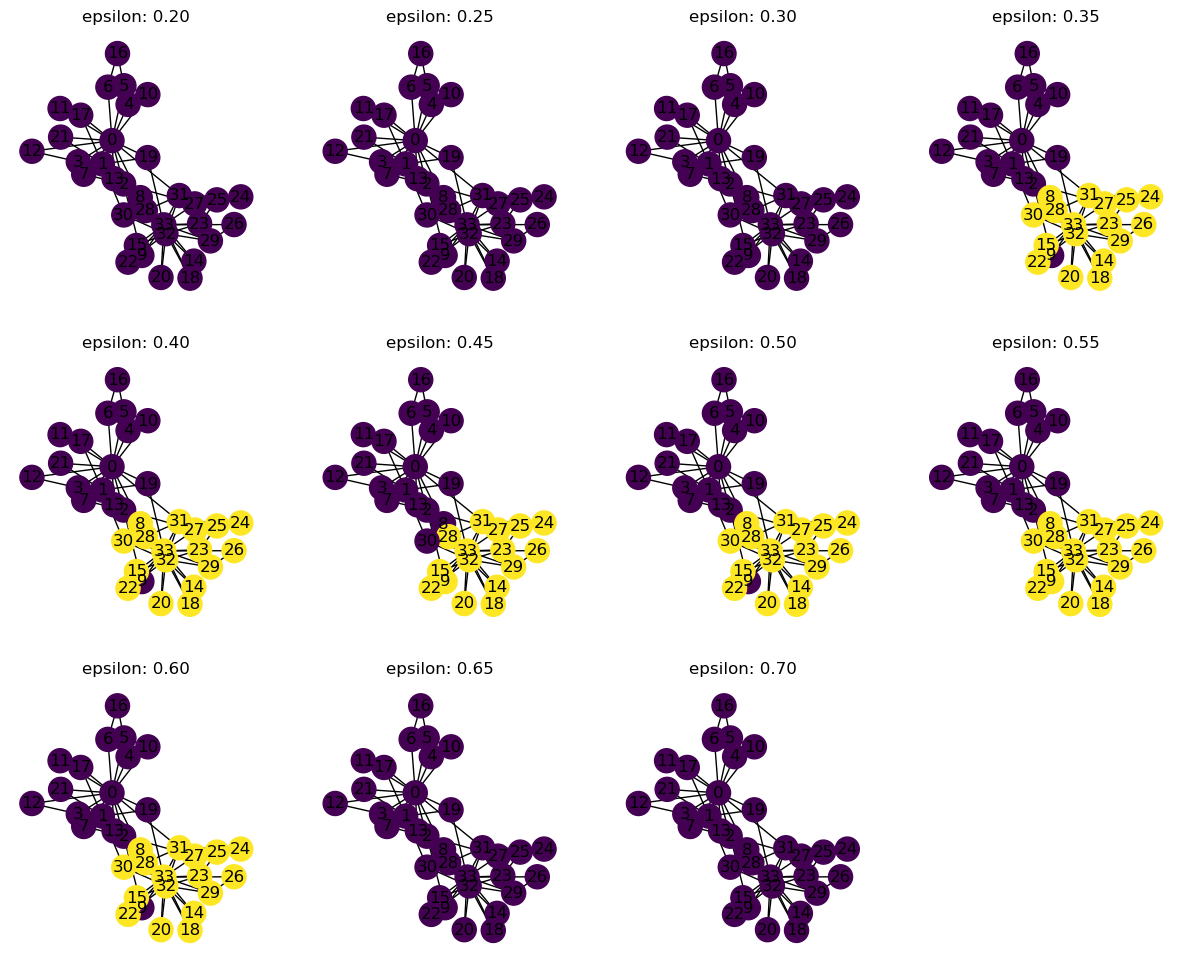

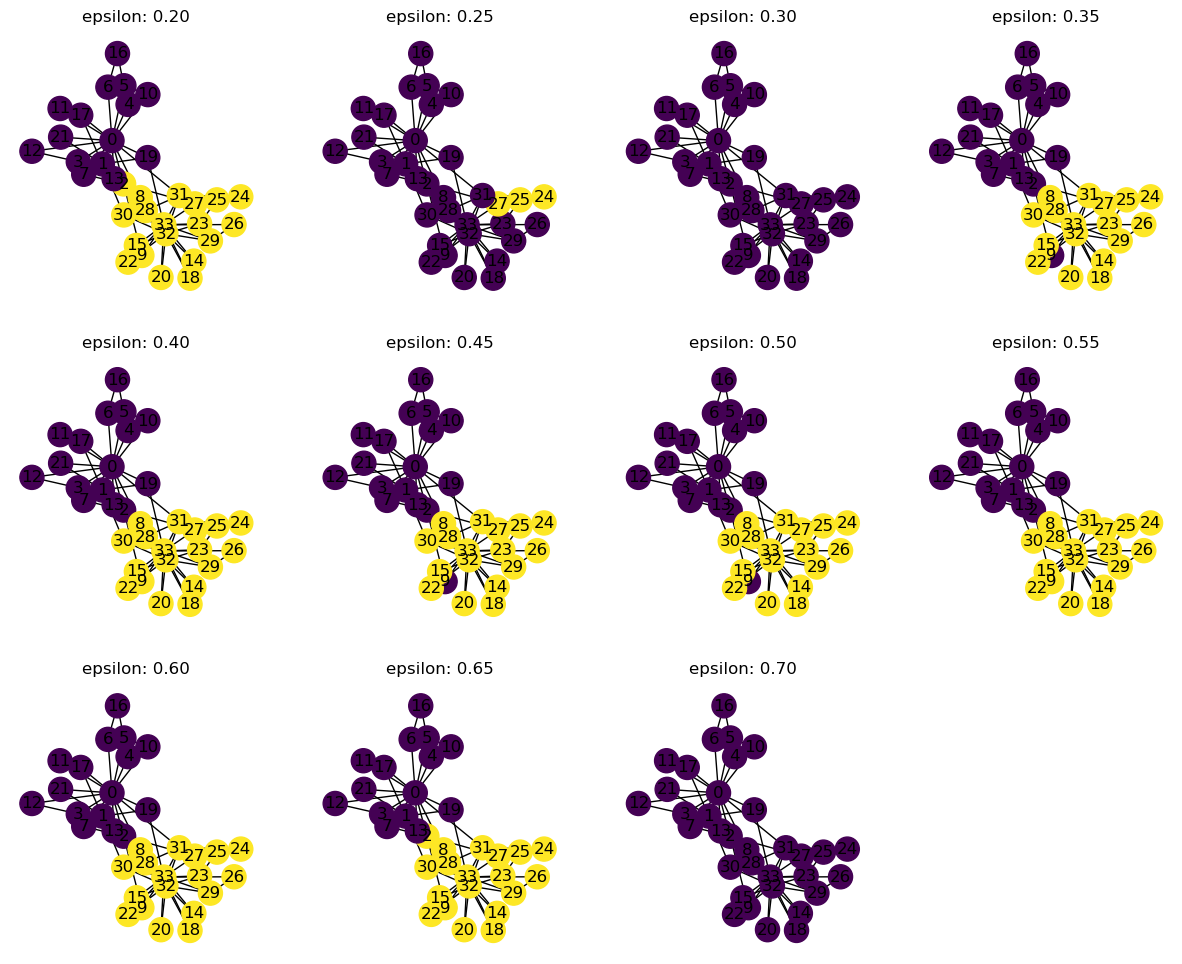

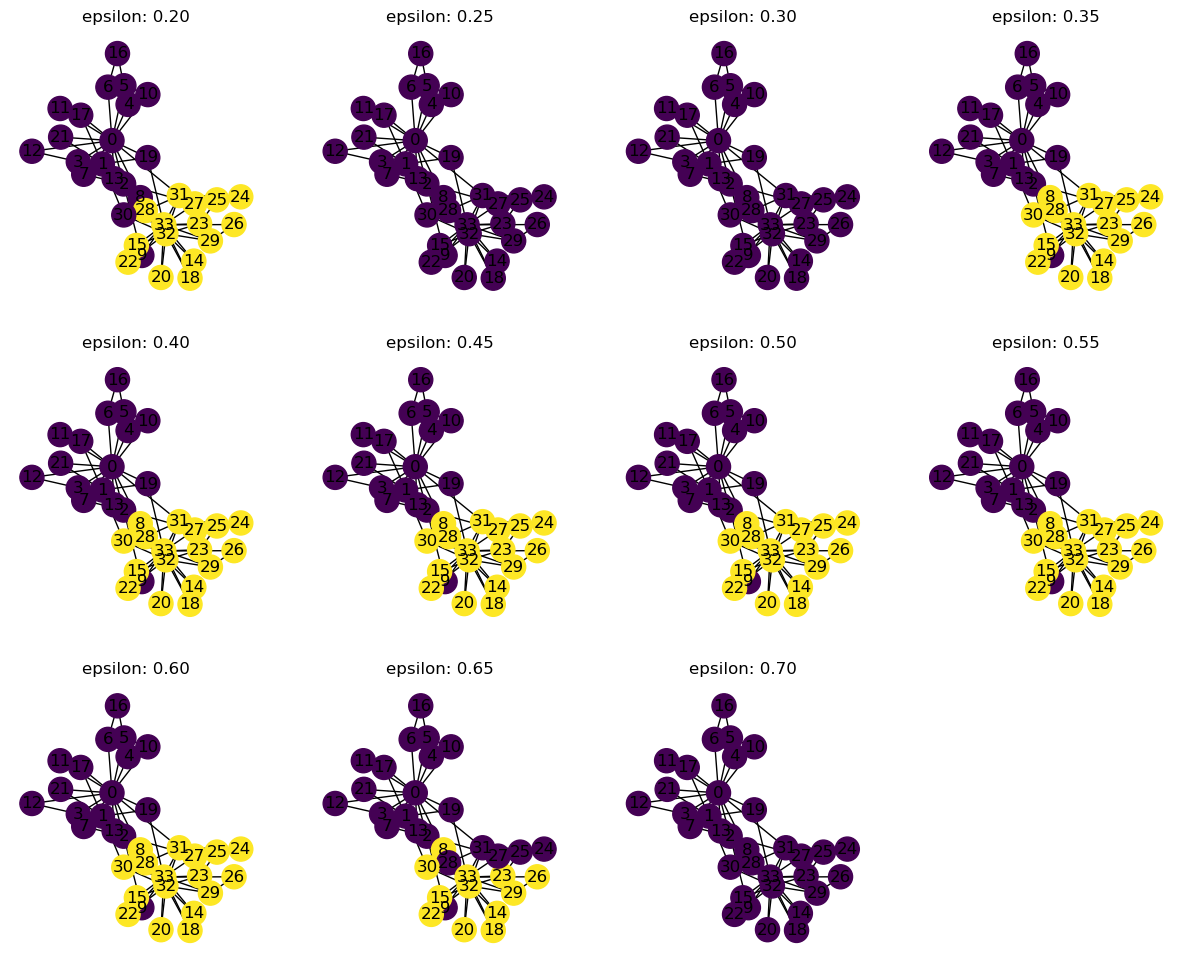

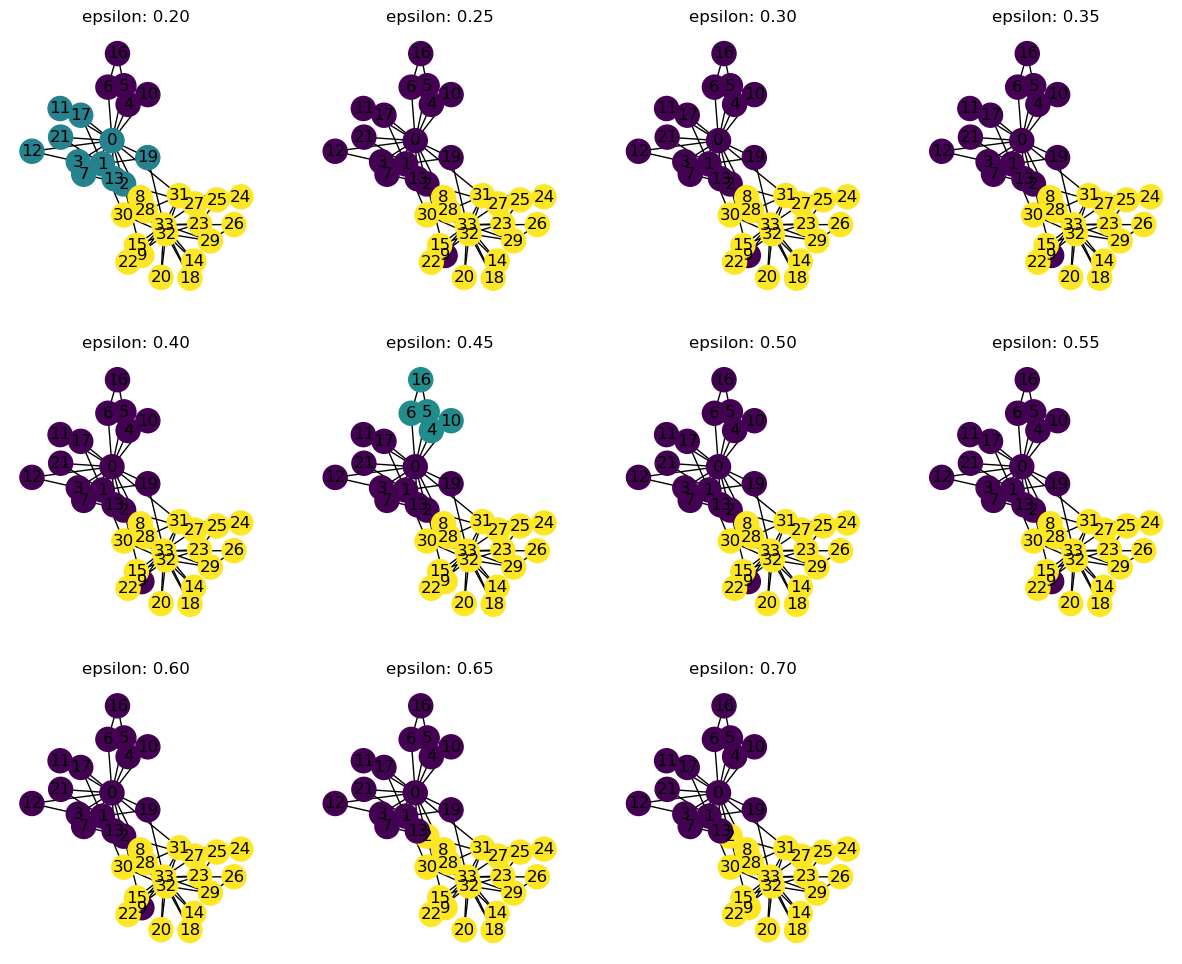

In [2]:
graph = nx.karate_club_graph()
pos = nx.spring_layout(graph, seed=42)

scores = dict()
grid = {
    'strategy': ['prob', 'freq'],
    'use_coreness': [True, False],
}
epsilon_grid = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

for strategy, use_coreness in product(*grid.values()):
    fig, axes = plt.subplots(3, 4, figsize=(15, 12))
    axes = axes.ravel()

    for index, epsilon in enumerate(epsilon_grid):
        ax: Axes = axes[index]
        labels = my_nlta(graph, epsilon, strategy, use_coreness, None, max_epochs=20)
        nx.draw(graph, pos, node_color=list(labels.values()), with_labels=True, ax=ax)
        ax.set_title(f'epsilon: {epsilon:.2f}')

    axes[-1].axis('off')

    fig.savefig(f'./visualizations/{strategy}-{use_coreness}.png')